# ACME Camping Supplies sales performance

This is my 3-hours worth of work on the [Retail Challenge](https://github.com/eliiza/challenge-retail).

Here I use [plotly](https://plotly.com/python/) to generate graphs. Feel free to zoom, pan, select etc., just hit the house icon to reset. Note that you can single-click in the legend to remove a group or double-click to remove all EXCEPT that group.

## Table of Contents

- [Q1](#q1---sales-performance)

## Setup

In [1]:
import pandas as pd
import plotly.express as px

raw_data = pd.read_csv('../data/01_raw/Retail.csv')

<a id=’sales-performance’></a>
# Q1 - Sales Performance

Analysed by 
country, sales channel, product and year.

## Year

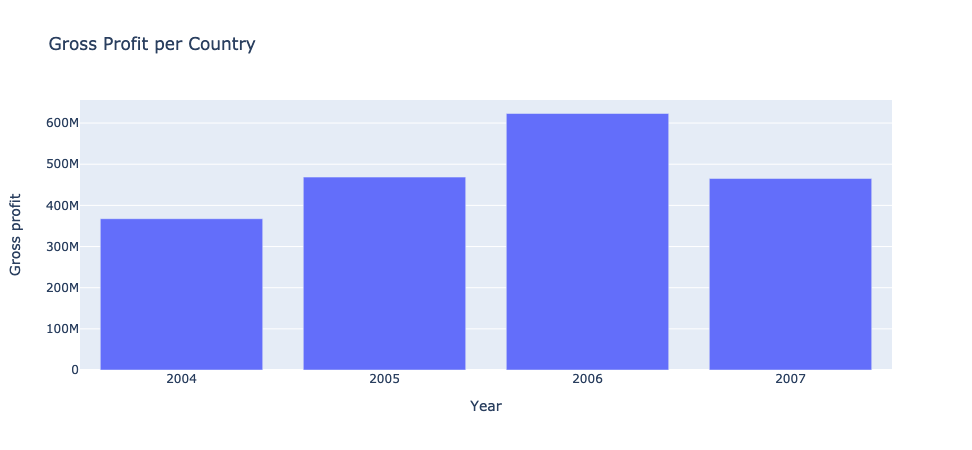

In [2]:
performance_year = raw_data.groupby(['Year']).sum()
performance_year['Gross profit yoy%'] = performance_year[['Gross profit']].apply(pd.Series.pct_change)

fig = px.bar(performance_year.reset_index(), 
        x='Year', 
        y='Gross profit',
        title="Gross Profit per Country",
        hover_data={'Gross profit yoy%':':.2%'})
fig.update_xaxes(type='category')
fig.show()

Gross profit has increased over 2004-2006 but has dropped 25.35% from 2006 to 2007 (**Eliiza note - I'm assuming that the data for 2007 is complete**).

Hover over the graph for values.

## Country

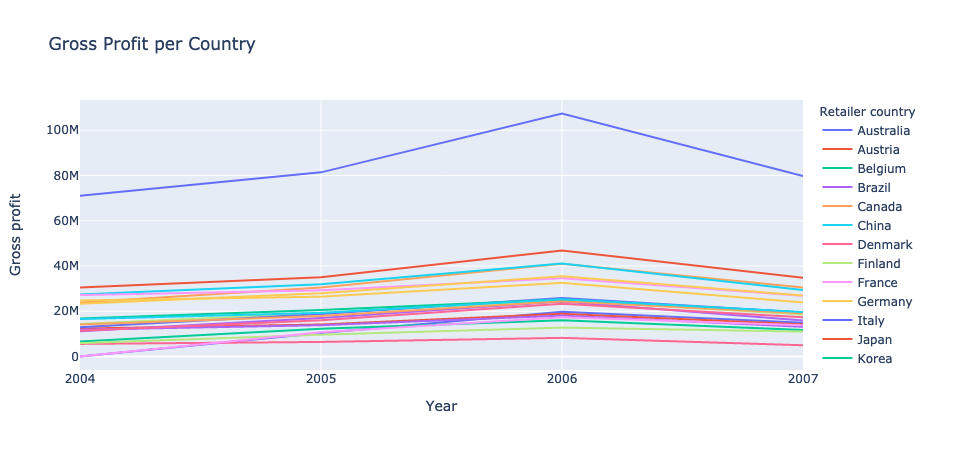

In [3]:
performance_country = raw_data.groupby(['Year', 'Retailer country']).sum()
fig = px.line(performance_country.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Retailer country',
        title="Gross Profit per Country")
fig.update_xaxes(type='category')
fig.show()

Here we can see that Gross Profit is down across the board for 2007. The following chart shows the YoY % change for each country

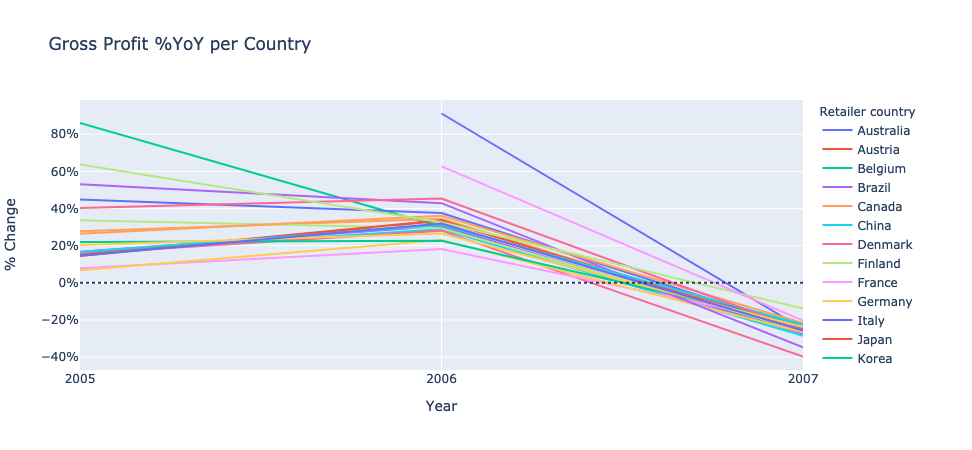

In [4]:
performance_country['Gross profit yoy%'] = performance_country.groupby('Retailer country')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_country.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Retailer country',
        title="Gross Profit %YoY per Country",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()

The drop for 2007 ranges from -13.90% for Sweden, to -39.68% in Denmark.

That the drop is consistent for all countries indicates that the cause is systemic. It could be either external, e.g. competition or global consumer confidence, or internal, e.g. poor customer service, loss of popular product line etc.


Let's look at sales channel performance to see if this sheds light on any issues with customer interactions.

## Sales channel

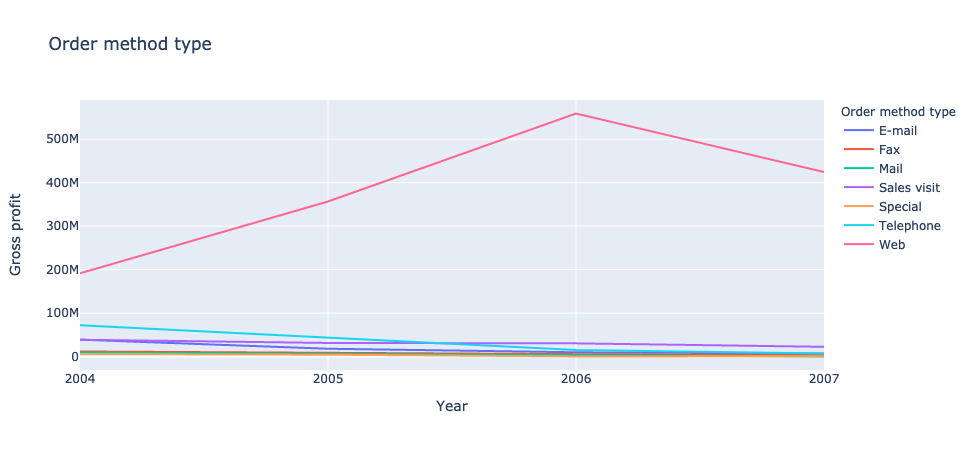

In [5]:
performance_channel = raw_data.groupby(['Year', 'Order method type']).sum()
fig = px.line(performance_channel.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Order method type',
        title="Order method type")
fig.update_xaxes(type='category')
fig.show()

Web sales dominate for our Camping supplies store and they have dropped substantially. The following chart shows the yoy% changes.

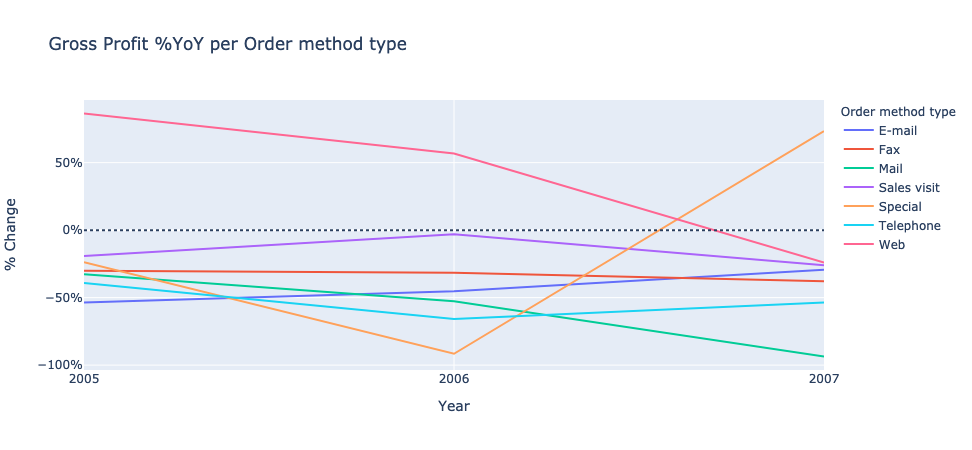

In [6]:
performance_channel['Gross profit yoy%'] = performance_channel.groupby('Order method type')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_channel.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Order method type',
        title="Gross Profit %YoY per Order method type",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()

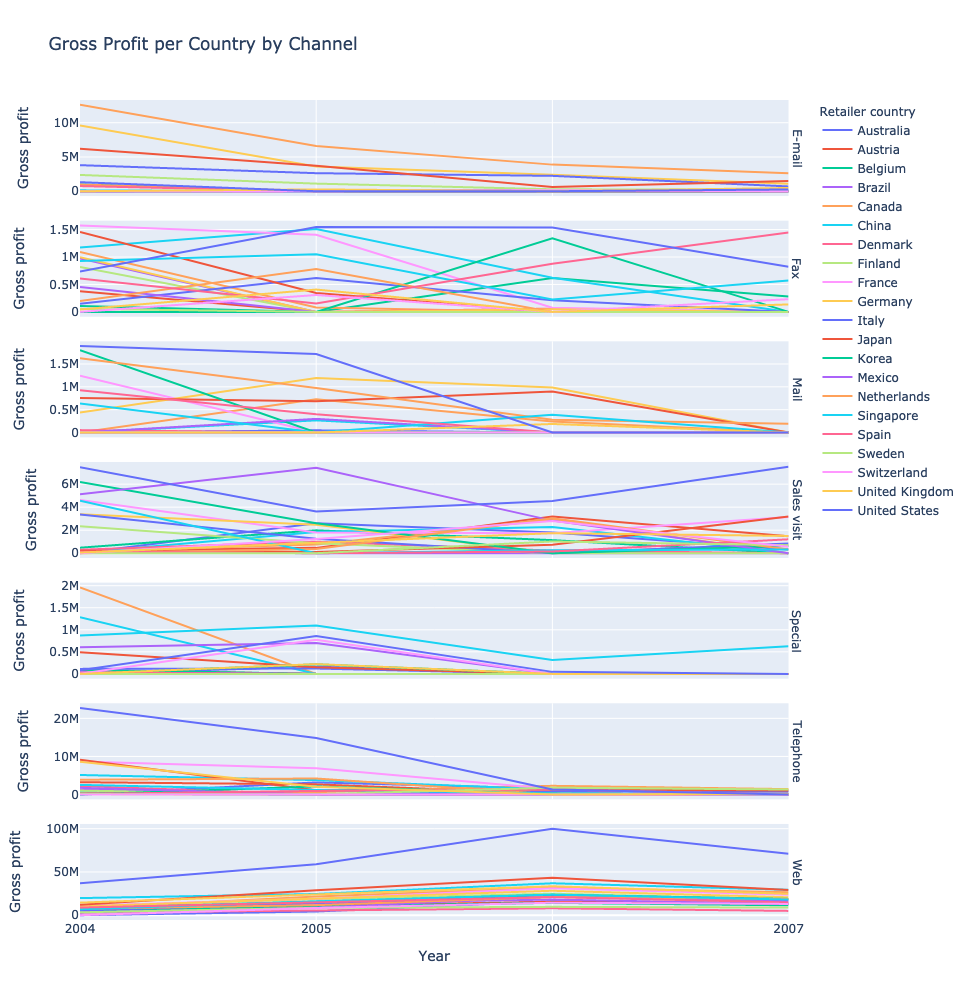

In [7]:
performance_country = raw_data.groupby(['Year', 'Retailer country', 'Order method type']).sum()
performance_country['Gross profit yoy%'] = performance_country.groupby('Retailer country')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_country.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Retailer country',
        title="Gross Profit per Country by Channel",
        hover_data={'Gross profit': ':,.0f'},
             facet_row='Order method type',
             height=1000)
fig.update_xaxes(type='category')
# fig.update_yaxes(tickformat=',.0f')
fig.update_yaxes(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

## Product

# TODO: collapse all the products in the 3x2 plot as it's noisy and doesn't really tell much. Write a conclusion that the downturn in gross profit is across EVERYTHING

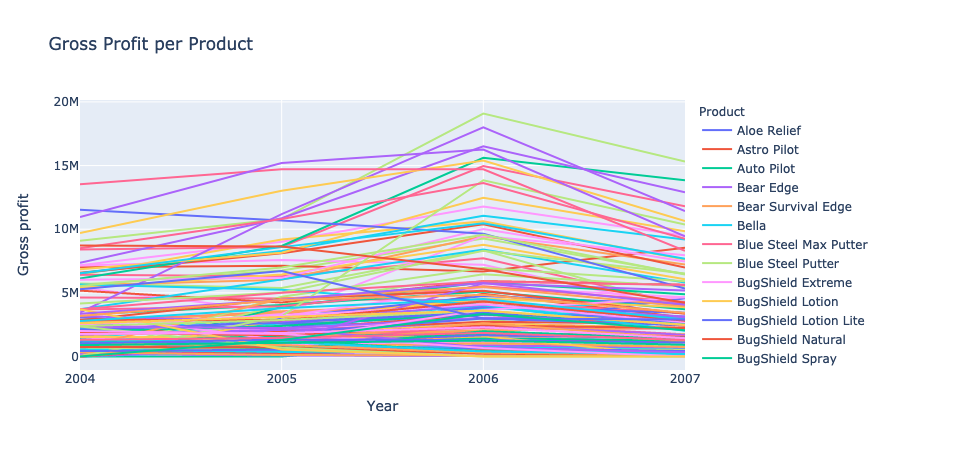

In [8]:
performance_product = raw_data.groupby(['Year', 'Product']).sum()
fig = px.line(performance_product.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Product',
        title="Gross Profit per Product",
             hover_data={'Quantity': ':,'})
fig.update_xaxes(type='category')
fig.show()

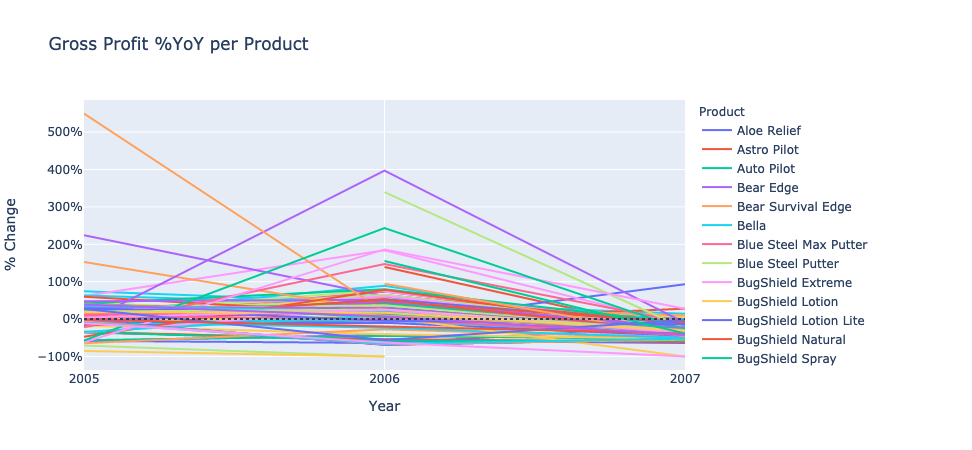

In [9]:
performance_product['Gross profit yoy%'] = performance_product.groupby('Product')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_product.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Product',
        title="Gross Profit %YoY per Product",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f',
                   'Quantity': ':,'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()

## Product type

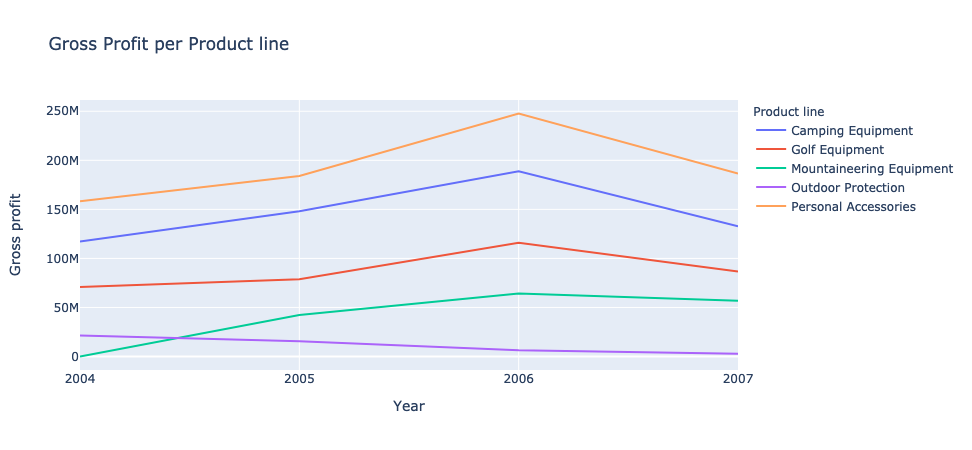

In [10]:
performance_line = raw_data.groupby(['Year', 'Product line']).sum()
fig = px.line(performance_line.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Product line',
        title="Gross Profit per Product line",
             hover_data={'Quantity': ':,'})
fig.update_xaxes(type='category')
fig.show()

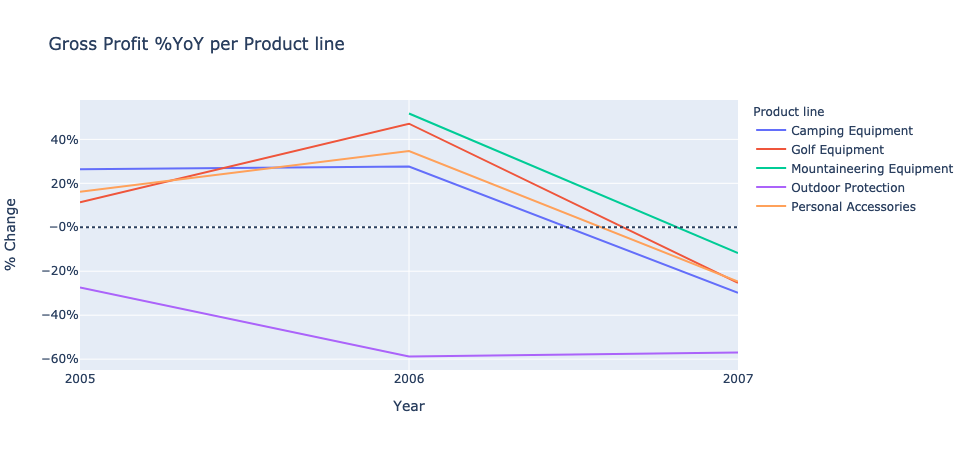

In [15]:
performance_line['Gross profit yoy%'] = performance_line.groupby('Product line')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_line.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Product line',
        title="Gross Profit %YoY per Product line",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f',
                   'Quantity': ':,'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()


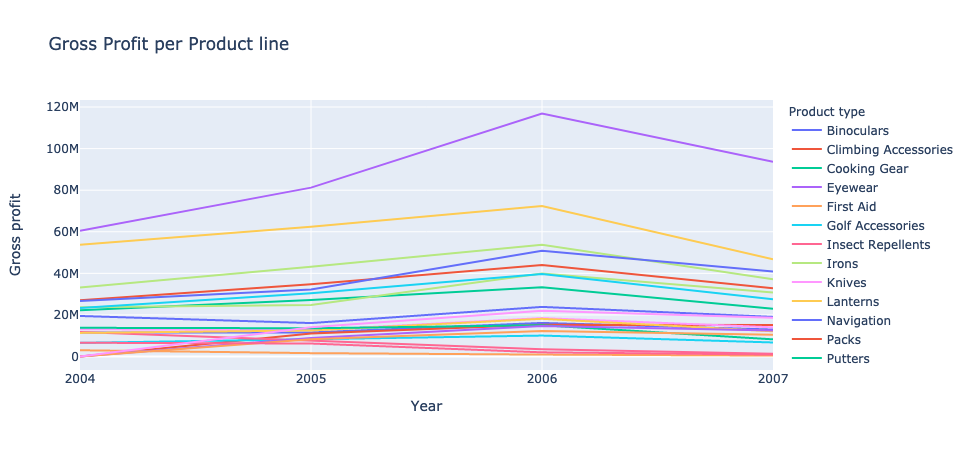

In [12]:
performance_type = raw_data.groupby(['Year', 'Product type']).sum()
fig = px.line(performance_type.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Product type',
        title="Gross Profit per Product line",
             hover_data={'Quantity': ':,'})
fig.update_xaxes(type='category')
fig.show()

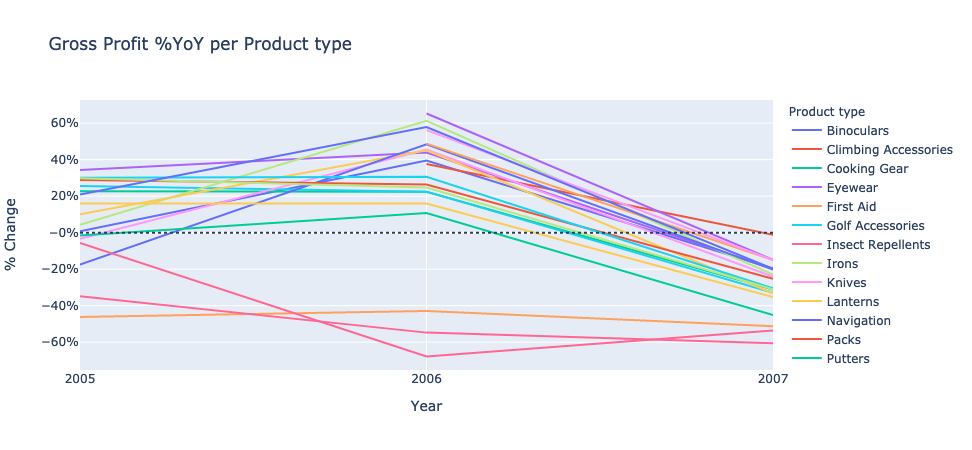

In [13]:
performance_type['Gross profit yoy%'] = performance_type.groupby('Product type')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_type.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Product type',
        title="Gross Profit %YoY per Product type",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f',
                   'Quantity': ':,'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()


# Q2 - recommendations for improving the store's profit

# Q3 - Predict the next year of sales for each country.

# Q4 - Additional data to Collect